In [1]:
# XGBoost docs
# https://xgboost.readthedocs.io/en/latest/index.html 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [3]:
# Delete this cell once the real data has been imported below

#### TEST #### 
#import seaborn as sns
#iris = sns.load_dataset('iris')
#X = iris[['sepal_length', 'sepal_width', 'petal_width']]
#y = iris['petal_length']

In [4]:
# Load the data into X, y
df = pd.read_csv('transfer_player_season_data.csv')

X = df[['inches', 'g', 'min', 'mpg', 'ppg', 'oreb', 'dreb', 'rpg', 'apg', 'tov',
       'ast_to', 'spg', 'bpg', 'usg', 'efg', 'ts', 'fgm',
       'ftm', 'fta', 'ft_pct', 'two_m', 'two_a', 'two_pct', 'three_m',
       'three_a', 'three_pct', 'dunk_m', 'dunk_a', 'dunk_pct', 'rim_m',
       'rim_a', 'rim_pct', 'mid_m', 'mid_a', 'mid_pct', 'porpag', 'dporpag',
       'adj_oe', 'drtg', 'adj_de', 'stops', 'obpm', 'dbpm', 'bpm', 'oreb_rate',
       'dreb_rate', 'ast', 'to', 'blk', 'stl', 'ftr', 'pfr', 'rec', 'pick',
       'fga', 'fg_pct']]
y = df['ortg']

In [5]:
# Split data into train, test data sets

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3) # can tune test_size if we want

In [6]:
# Load train, test data sets into DMatrix

dtrain = xgb.DMatrix(train_X, train_y)
dtest = xgb.DMatrix(test_X, test_y)

In [7]:
# set params, metrics for evaluation

param = {"max_depth": 6, "eta": 0.3, "objective": "reg:squarederror"} # tune these later !!
watchlist = [(dtest, "eval"), (dtrain, "train")]

In [8]:
# init model 

model = xgb.train(param, dtrain, num_boost_round=15, evals=watchlist)

[0]	eval-rmse:68.07456	train-rmse:68.26576
[1]	eval-rmse:47.83360	train-rmse:47.95724
[2]	eval-rmse:33.64932	train-rmse:33.72659
[3]	eval-rmse:23.76187	train-rmse:23.78020
[4]	eval-rmse:16.91581	train-rmse:16.82023
[5]	eval-rmse:12.10344	train-rmse:11.98044
[6]	eval-rmse:8.79033	train-rmse:8.60185
[7]	eval-rmse:6.54418	train-rmse:6.28842
[8]	eval-rmse:5.06686	train-rmse:4.70133
[9]	eval-rmse:4.10331	train-rmse:3.65199
[10]	eval-rmse:3.49246	train-rmse:2.96240
[11]	eval-rmse:3.13817	train-rmse:2.52425
[12]	eval-rmse:2.92421	train-rmse:2.24531
[13]	eval-rmse:2.80136	train-rmse:2.06812
[14]	eval-rmse:2.71879	train-rmse:1.95768


In [9]:
# run model on test data

pred_y = model.predict(dtest)

In [10]:
# MSE of test data

mse = np.square(np.subtract(pred_y,test_y)).mean()
print(np.round(mse, 4))

7.3918


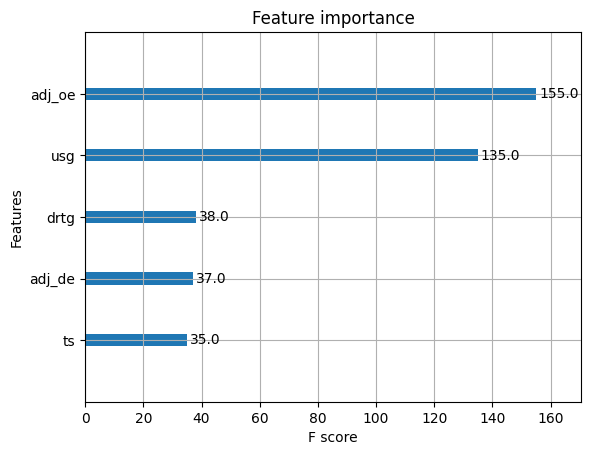

In [11]:
# plots importance graph

xgb.plot_importance(model, max_num_features=5);
#plt.savefig('importance.pdf', dpi=900)
plt.show()

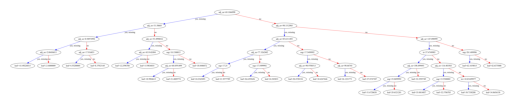

In [12]:
# plots XGBoost tree
from xgboost import plot_tree

xgb.plot_tree(model, num_trees=0);
#plt.savefig('xgb-tree.pdf', dpi=900)
plt.show()

In [13]:
# Baseline models

baseline_mean = train_y.mean()
baseline_median = train_y.median()

In [14]:
# MSE for both baseline models 

mse_mean = np.square(np.subtract(baseline_mean ,test_y)).mean()
print('Baseline MSE for train_y mean:', np.round(mse_mean, 4))
mse_med = np.square(np.subtract(baseline_median ,test_y)).mean()
print('Baseline MSE for train_y median:', np.round(mse_med, 4))

Baseline MSE for train_y mean: 517.2912
Baseline MSE for train_y median: 528.4958


In [15]:
# Difference in XGBoost and Baselines

print('The difference between MSE of XGB and baseline mean is:', np.round(mse_mean - mse, 4))
print('The difference between MSE of XGB and baseline median is:', np.round(mse_med - mse, 4))

The difference between MSE of XGB and baseline mean is: 509.8994
The difference between MSE of XGB and baseline median is: 521.104
